# Linear Regression

#### Importing the libraries

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline

#### Introducing the dataset

In [5]:
N_SAMPLES = 30
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def true_fun(X):
    return 3 * X + 4

X = 2 * np.random.rand(N_SAMPLES, 1)
y = true_fun(X) + np.random.randn(N_SAMPLES, 1) * 0.5 # Adding some noise

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

#### Visualizing the data

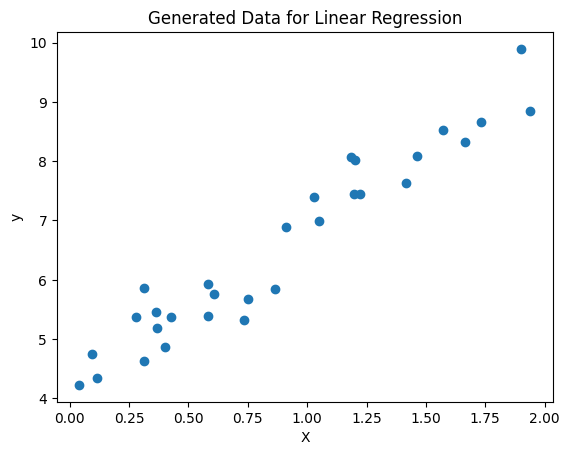

In [6]:
# Plotting the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

#### Fitting a linear regression model

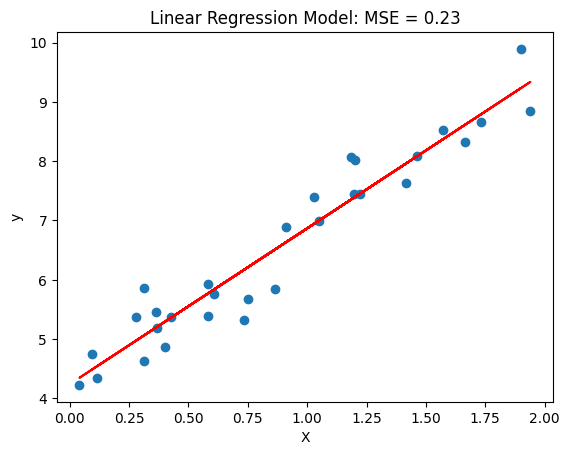

In [4]:
# Initializing the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_test, lin_reg.predict(X_test))

# Visualizing the learned model
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression Model: MSE = {mse:.2f}')
plt.show()

## Polynomial Regression

In [5]:
np.random.seed(RANDOM_SEED)

def true_fun(X):
    return 3 * X ** 2 + 4

X = 2 * np.random.rand(N_SAMPLES, 1)
y = true_fun(X) + np.random.randn(N_SAMPLES, 1) * 0.5 # Adding some noise

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

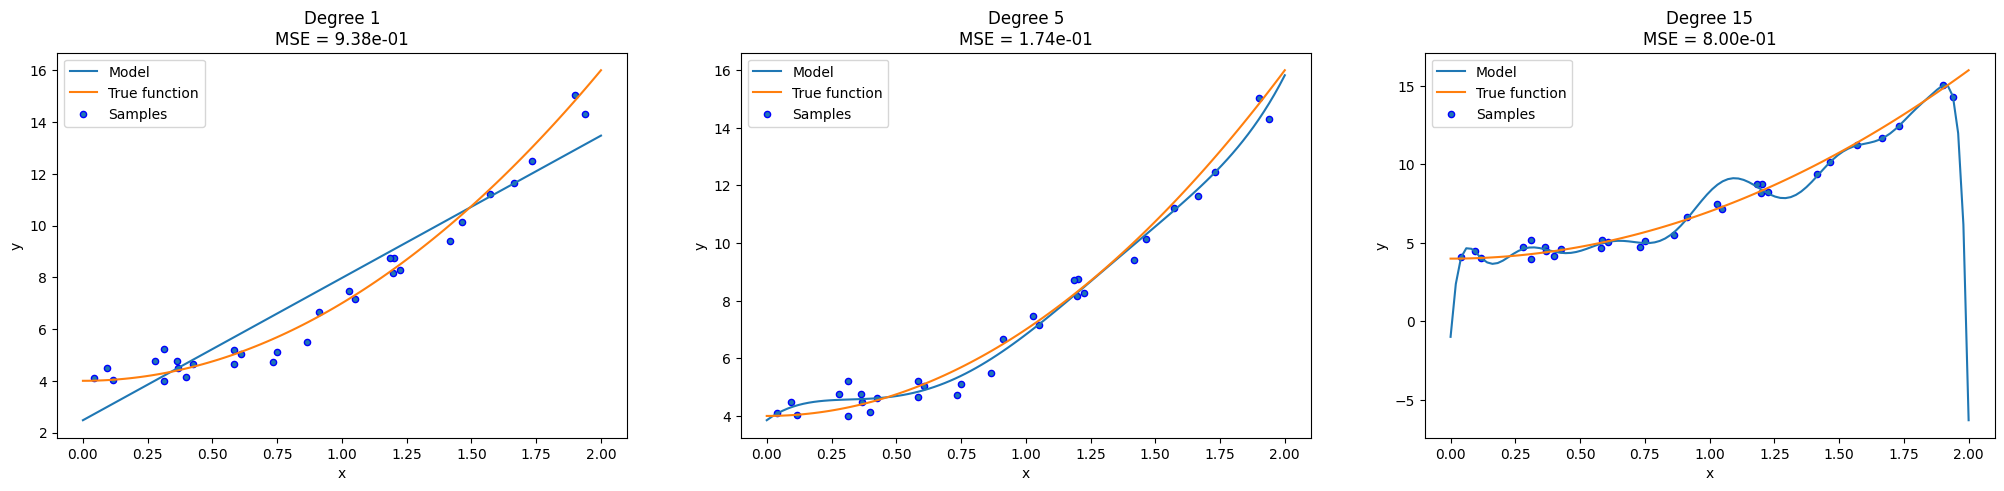

In [6]:
degrees = [1, 5, 15]
maxX = math.ceil(max(X)[0])

plt.figure(figsize=(25, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    # Create standard scaler
    scaler = StandardScaler()

    # Create linear regression model
    linear_regression = LinearRegression()

    # Using Pipeline to combine multiple steps into one
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("scaler", scaler),
            ("linear_regression", linear_regression),
        ]
    )

    # Training the model
    pipeline.fit(X_train, y_train)

    # Evaluating the model
    mse = mean_squared_error(y_test, pipeline.predict(X_test))


    # Visualizing the learned model
    # Create a domain of inputs to visualize the learned model
    domain = np.linspace(0, maxX, 100)

    plt.plot(domain, pipeline.predict(domain[:, np.newaxis]), label="Model")
    plt.plot(domain, true_fun(domain[:, np.newaxis]), label="True function")

    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")

    plt.title(
        f"Degree {degrees[i]}\nMSE = {mse:.2e}")

plt.show()

## Gradient Descent

#### Grid Search & Cross Validation
!! They are not the same thing !!

In [10]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Generate some sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=RANDOM_SEED)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SGDRegressor model
sgd_regressor = SGDRegressor()

# Define hyperparameters for the grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l1', 'l2'],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate the model on the test set using best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Best Parameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}
Best Score (neg_mean_squared_error): -0.009567512795618984
Test Score: 0.9999994322209265
